In [31]:
import yfinance as yf

In [32]:
# Define the ticker symbol and the date range
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2024-09-19"

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465667,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800
...,...,...,...,...,...,...
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400


<Axes: >

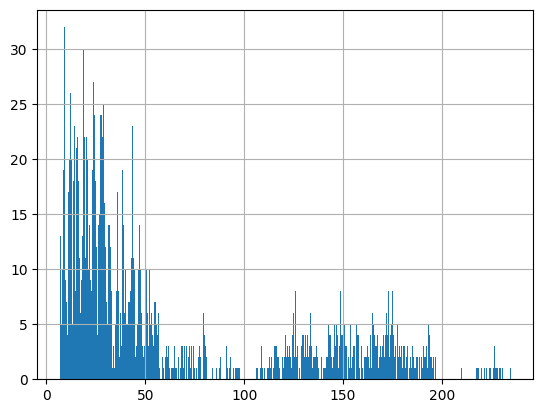

In [33]:
data["Close"].hist(bins=1000)

In [34]:
from sklearn.preprocessing import StandardScaler
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
X = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]][:-1].values.reshape(-1, 6)
y = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]][1:].values

X.shape, y.shape

((3701, 6), (3701, 6))

In [36]:
X_train, X_test = X[: int(len(X) * 0.8)], X[int(len(X) * 0.8) :]
y_train, y_test = y[: int(len(y) * 0.8)], y[int(len(y) * 0.8) :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2960, 6), (741, 6), (2960, 6), (741, 6))

In [37]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = []
last_data = X_test[0].reshape(1, 6)

for i in range(y_test.shape[0]):
    last_data = model.predict(last_data)
    y_pred.append(last_data)

y_pred = np.array(y_pred).reshape(-1, 6)
y_pred.shape

(741, 6)

In [39]:
close_test = y_test[:, 3]
close_pred = y_pred[:, 3]

In [40]:
# Import RMSE and MAPE
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE and MAPE
rmse = root_mean_squared_error(close_test, close_pred)
mape = mean_absolute_percentage_error(close_test, close_pred)

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 37.16280159742921
MAPE: 0.1635281101649332
